## 1. IMPOTATION DES LIBRAIRIES

In [6]:
# importation des libairies
import numpy as np
import pandas as pd

## 2 CHARGEMENT DES DONNEES

In [7]:
data=pd.read_csv('Data/studentscores.csv')

In [8]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# 3. Analyse des donnees

In [11]:
# 3. Analyse des donnees

data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [14]:
data['Hours']

0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
Name: Hours, dtype: float64

In [15]:
data['Hours'].max()

np.float64(9.2)

In [16]:
print(data['Hours'].max())

9.2


In [20]:
print("Max Scores : ",data['Scores'].max())

Max Scores :  95


In [21]:
print("Min Scores : ",data['Scores'].min())

Min Scores :  17


# 4.Division des donees

## variables indep et variables dep

In [29]:
X=data.iloc[: , :-1].values
Y=data.iloc[ :, -1].values

In [27]:
X

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [30]:
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86])

# 4.1 Separatiration des donnees: Train et Test

In [31]:
from sklearn.model_selection import train_test_split 

In [32]:
train_test_split(X,Y,test_size=0.25,random_state=40)

[array([[3.2],
        [5.9],
        [1.9],
        [3.5],
        [8.3],
        [2.5],
        [3.8],
        [2.7],
        [2.5],
        [2.7],
        [7.7],
        [6.9],
        [4.5],
        [5.1],
        [6.1],
        [1.5],
        [5.5],
        [9.2]]),
 array([[8.9],
        [7.8],
        [1.1],
        [7.4],
        [3.3],
        [8.5],
        [4.8]]),
 array([27, 62, 24, 30, 81, 30, 35, 30, 21, 25, 85, 76, 41, 47, 67, 20, 60,
        88]),
 array([95, 86, 17, 69, 42, 75, 54])]

In [34]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=40)

In [35]:
print("X-train shape: " , X_train.shape)
print("X-test shape: " , X_test.shape)
print("Y-train shape: " , Y_train.shape)
print("Y-test shape: " , Y_test.shape)

X-train shape:  (18, 1)
X-test shape:  (7, 1)
Y-train shape:  (18,)
Y-test shape:  (7,)


# 5. Construire le MODELE

In [36]:
# import Linear Regression algorithm
from sklearn.linear_model import LinearRegression

In [37]:
modele_lineaire=LinearRegression()

In [38]:
#Entrainement du modele
modele_lineaire.fit(X_train,Y_train)

LinearRegression()

In [44]:
# faire des predictionX
Y_scores_predits=modele_lineaire.predict(X_test)

In [45]:
Y_scores_predits

array([90.34862057, 79.20125828, 11.303688  , 75.147672  , 33.59841257,
       86.29503428, 48.79936114])

In [46]:
Y_test

array([95, 86, 17, 69, 42, 75, 54])

In [47]:
resultat=pd.DataFrame(Y_test,Y_scores_predits)

In [48]:
resultat

,0
90.348621,95
79.201258,86
11.303688,17
75.147672,69
33.598413,42
86.295034,75
48.799361,54


In [49]:
# Evaluation du modele
from sklearn.metrics import mean_squared_error , r2_score

In [50]:
print("MSE de la regression Lineaire: ",mean_squared_error(Y_test,Y_scores_predits)) 

MSE de la regression Lineaire:  51.90159659147337


In [51]:
print("R2 score de la regression Lineaire: ",r2_score(Y_test,Y_scores_predits))

R2 score de la regression Lineaire:  0.9168569951293908


# 6. Visualisation de Resultat

In [52]:
import matplotlib.pyplot as plt

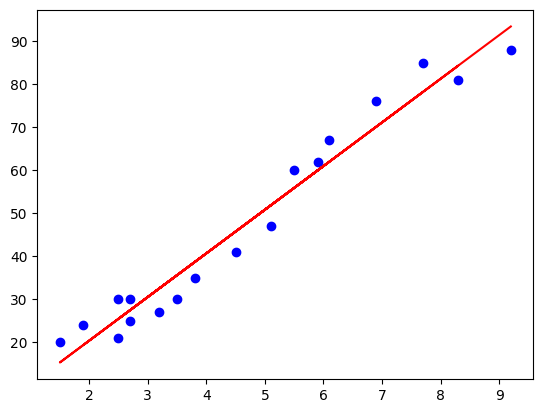

In [64]:
plt.scatter(X_train,Y_train,color='blue',label='Train Data')
#plt.plot(X_test,Y_scores_predits,color='red', label='lignr de la regression')
plt.plot(X_train,modele_lineaire.predict(X_train),color='red', label='ligne de la regression')
plt.show()

# Preiction simple

In [58]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [61]:
resultats=pd.DataFrame({'y-score-reel':Y_test,'y-score-predict':Y_scores_predits})
resultats

,y-score-reel,y-score-predict
0,95,90.348621
1,86,79.201258
2,17,11.303688
3,69,75.147672
4,42,33.598413
5,75,86.295034
6,54,48.799361


In [62]:
Y_scores_predits

array([90.34862057, 79.20125828, 11.303688  , 75.147672  , 33.59841257,
       86.29503428, 48.79936114])

In [65]:
modele_lineaire.predict([[10]])

array([101.49598285])

In [66]:
difference=Y_test-Y_scores_predits

In [69]:
resultats=pd.DataFrame({'y-score-reel':Y_test,'y-score-predict':Y_scores_predits,'Difference':difference})
resultats

,y-score-reel,y-score-predict,Difference
0,95,90.348621,4.651379
1,86,79.201258,6.798742
2,17,11.303688,5.696312
3,69,75.147672,-6.147672
4,42,33.598413,8.401587
5,75,86.295034,-11.295034
6,54,48.799361,5.200639


In [70]:
print("b1= ",modele_lineaire.coef_)

b1=  [10.13396571]


In [71]:
print("b0= ",modele_lineaire.intercept_)

b0=  0.1563257200808863


In [73]:
print(modele_lineaire.predict([[5]]))

[50.82615429]
